# Aprenentatge No Supervisat - Agrupació
## Classifica els diferents vols
**Descripció**
Anem a practicar i a familiaritzar-nos amb algoritmes de clustering.

In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import time

from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from tqdm.notebook import tqdm

from utils import SinCosTransformer

import warnings
warnings.simplefilter('ignore')

SEED = 42
TEST_SIZE = 0.2
TESTING = True

### Carreguem les dades

In [2]:
dfdelays = pd.read_pickle('../data/S11-CleanDelayedFlights.pickle')

In [3]:
# Fem un sample de les dades per fer el procés més ràpid 

if TESTING:
    dfdelays = dfdelays.sample(frac=0.05, random_state=SEED)
    
dfdelays.shape

(96419, 87)

## Nivell 1
### Exercici 1
Classifica els diferents vols utilitzant l'algorisme de K-means.

In [4]:
from sklearn.cluster import KMeans

In [5]:
# def make_pipeline(data, columns, model):
#     cols_num = data[columns].select_dtypes(include=['int','float']).columns.to_list()
#     cols_cat = data[columns].select_dtypes(include=['object']).columns.to_list()
#     cols_date = data[columns].select_dtypes(include=['datetime']).columns.to_list()
    
#     ct = ColumnTransformer(
#              transformers=[('num', RobustScaler(), cols_num),
#                           ('cat', OneHotEncoder(handle_unknown='ignore'), cols_cat),
#                           ('date', SinCosTransformer(['hour','day','dayofweek','month','weekofyear']), cols_date )])
    
#     pipeline = Pipeline( steps=[('transformer', ct),
#                                ('cluster', model)])
    
#     return pipeline, ct



In [31]:
# columnes que utilitzarem

base_cols = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 
             'DepartureTime', 'CRSDepartureTime', 'ArrivalTime', 'CRSArrivalTime', 
             'UniqueCarrier', 'AirTime', 'DepDelay', 'ArrDelay',
             'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 
             'CRSElapsedTime_c', 'ActualElapsedTime_c']

cols_new = ['DepDelay',  'Distance', 'ArrDelay',
            'UniqueCarrier', 
            'CRSElapsedTime_c', 'ActualElapsedTime_c', 
            'DepartureTime', 'CRSDepartureTime', 
            'ArrivalTime', 'CRSArrivalTime', 
            'Dep_hourlyf', 'Dep_dailyf', 'Arr_dailyf', 'Arr_hourlyf',    
            'Origin_lat', 'Origin_long', 'Dest_lat', 'Dest_long', 
            'velocity', 'CRSvelocity']

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, IncrementalPCA

In [17]:
from sklearn.metrics import silhouette_score, silhouette_samples
clusters = np.arange(2, 11)

X = dfdelays[base_cols]

results_sil = []
results_sse = []

# seleccionem les columnes per tipus
cols_num = dfdelays[base_cols].select_dtypes(include=['int','float']).columns.to_list()
cols_cat = dfdelays[base_cols].select_dtypes(include=['object']).columns.to_list()
cols_date = dfdelays[base_cols].select_dtypes(include=['datetime']).columns.to_list()
    

ct = ColumnTransformer(
             transformers=[('num', MinMaxScaler(), cols_num),
                          ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), cols_cat),
                          ('date', SinCosTransformer(['hour','day','dayofweek','month','weekofyear']), cols_date )])
X_transf = ct.fit_transform(X)    

print(f'Tenim {X_transf.shape[1]} paràmetres/columnes')

Tenim 659 paràmetres/columnes


In [10]:
# Usem PCA per reduir dimensions
pca = IncrementalPCA(n_components=5)

X_pca = pca.fit_transform(X_transf)

In [11]:
X_pca.shape

(96419, 5)

In [12]:
pca.explained_variance_ratio_.sum()

0.6434252753404321

##### Apliquem kmeans a diferents mides de cluster...

In [13]:
for cl in tqdm(clusters):
    km = KMeans(n_clusters=cl, random_state=SEED, n_jobs=3)

    clust_labels = km.fit_predict(X_pca)
    sil_sc = silhouette_score(X_pca, clust_labels)

    results_sil.append(sil_sc)
    results_sse.append(km.inertia_)
    print(f'Clusters {cl}: Silhouette_score: {sil_sc}')

    

  0%|          | 0/9 [00:00<?, ?it/s]

Clusters 2: Silhouette_score: 0.25570593038003536
Clusters 3: Silhouette_score: 0.23647655254285926
Clusters 4: Silhouette_score: 0.20469059610953252
Clusters 5: Silhouette_score: 0.19095677734345712
Clusters 6: Silhouette_score: 0.18797613265133292
Clusters 7: Silhouette_score: 0.19117753806769497
Clusters 8: Silhouette_score: 0.19141667569755358
Clusters 9: Silhouette_score: 0.20282239059549803
Clusters 10: Silhouette_score: 0.1977449338162083


##### i observem els resultats

In [15]:
sns.lineplot(x=clusters, y=results_sil, )

sns.lineplot(x=clusters, y=results_sse)

Agafem l'exemple de [scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.16090458579737552
For n_clusters = 3 The average silhouette_score is : 0.13872553245129668
For n_clusters = 4 The average silhouette_score is : 0.11084576508328471
For n_clusters = 5 The average silhouette_score is : 0.09812221889172554
For n_clusters = 6 The average silhouette_score is : 0.09311985267819574
For n_clusters = 7 The average silhouette_score is : 0.09322820164769223
For n_clusters = 8 The average silhouette_score is : 0.0922325703989287
For n_clusters = 9 The average silhouette_score is : 0.09489262567244827
For n_clusters = 10 The average silhouette_score is : 0.08864891894653545


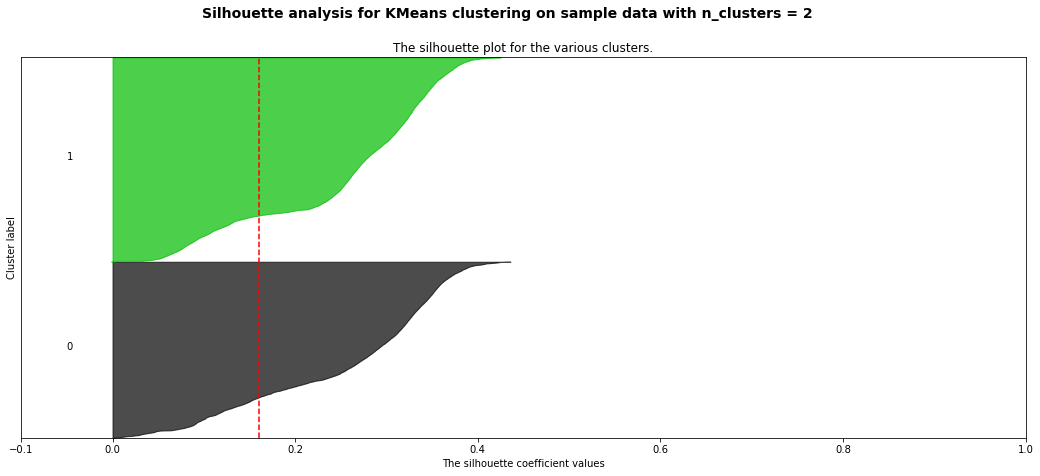

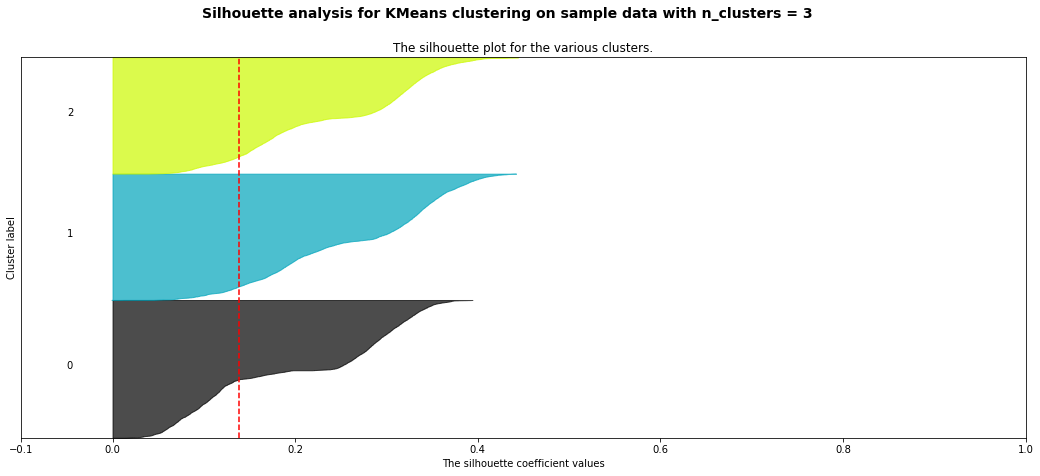

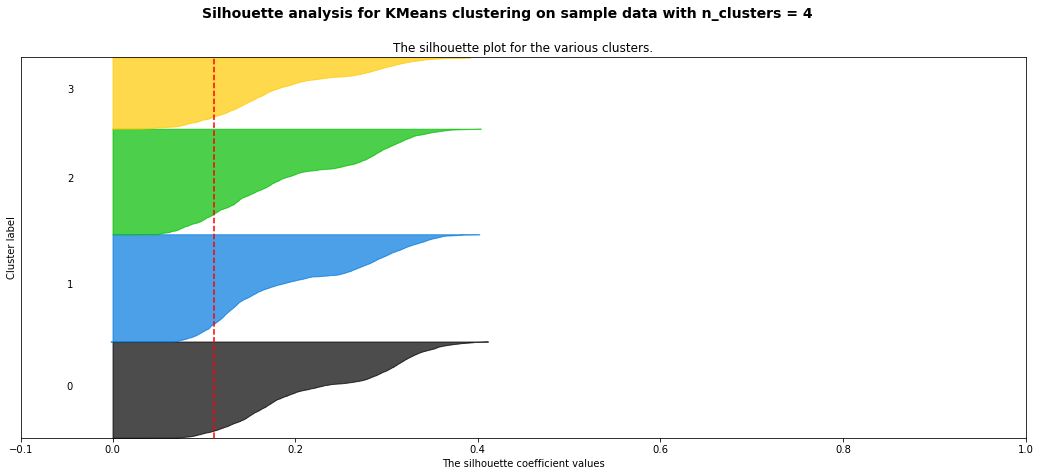

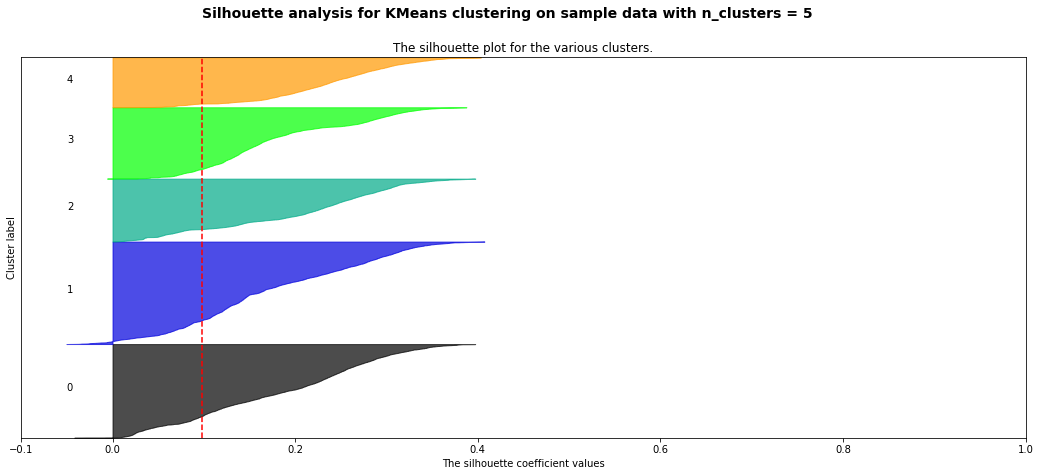

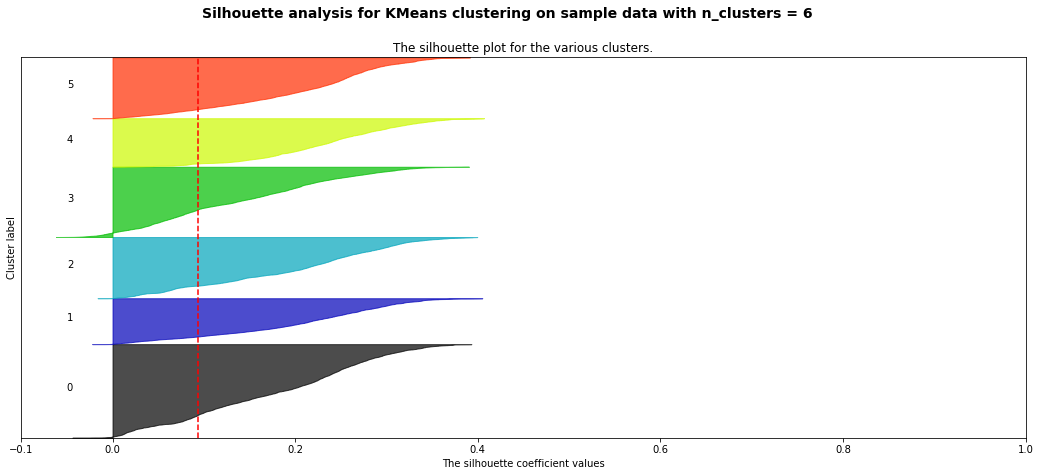

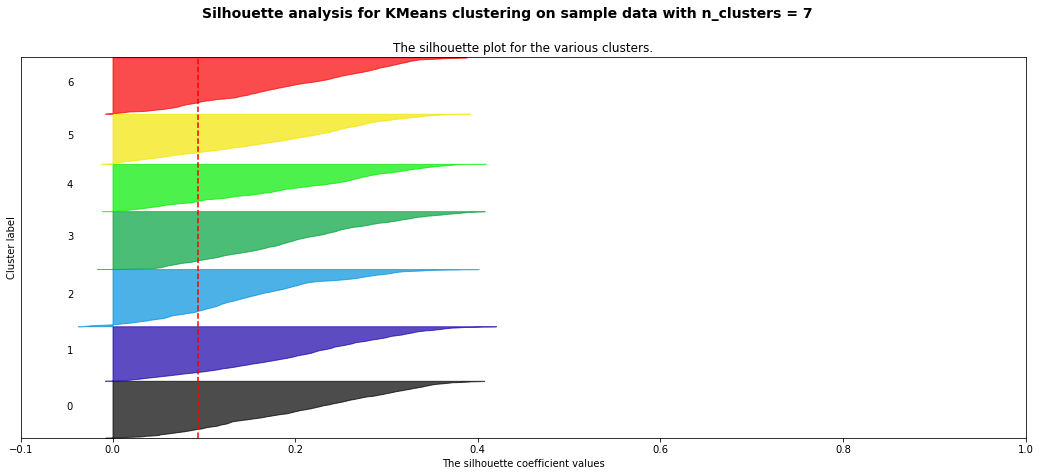

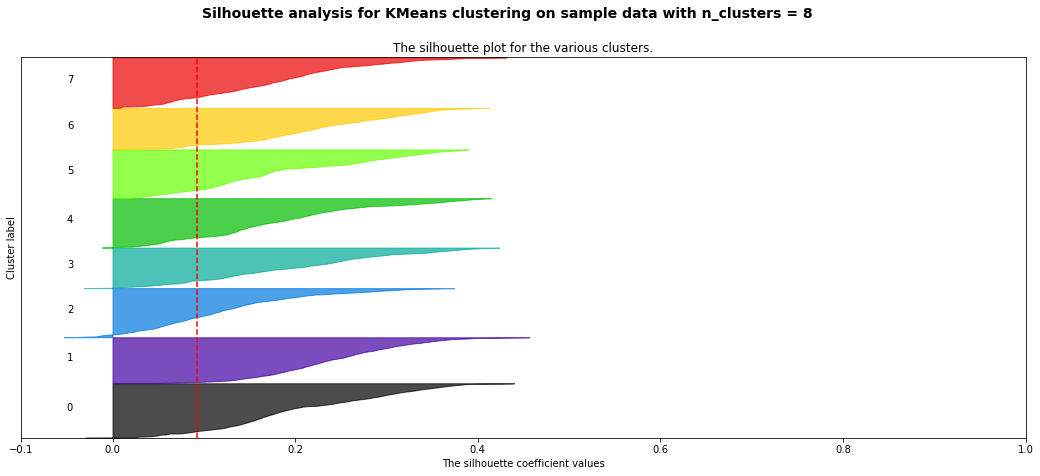

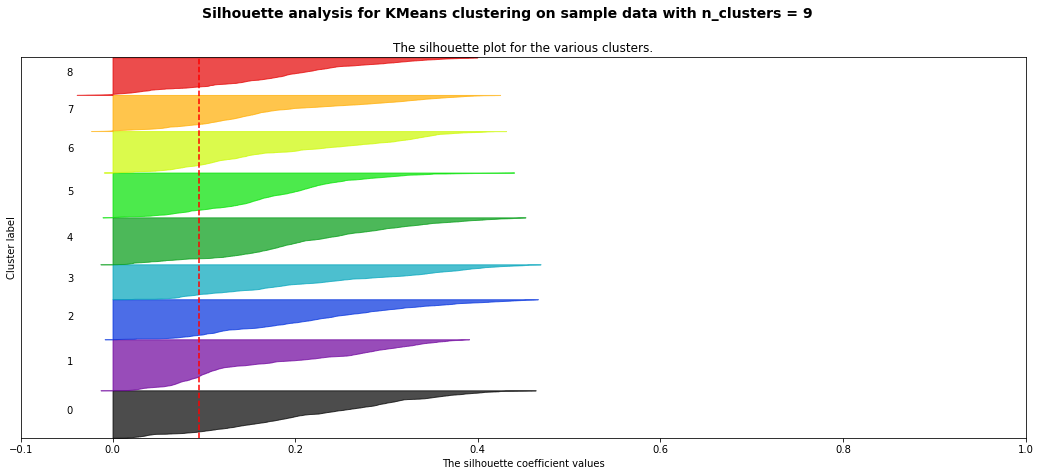

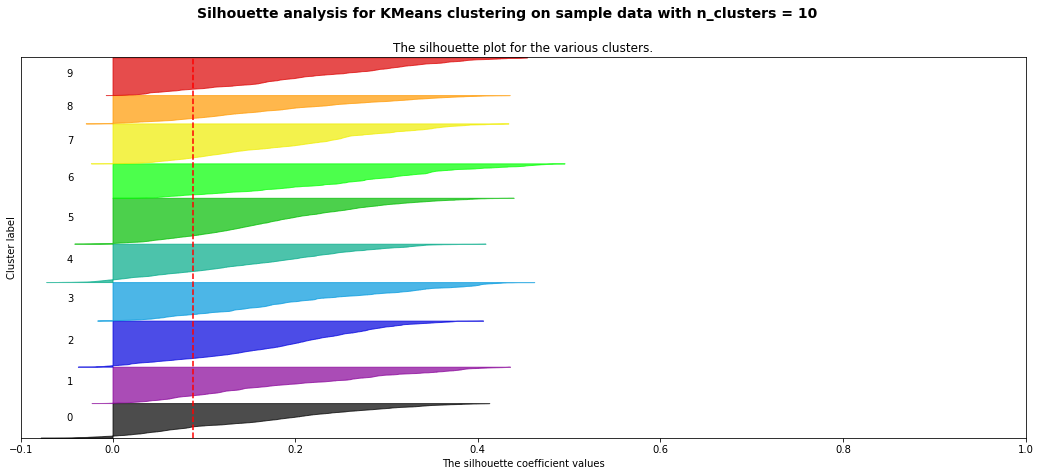

In [38]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

# range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=SEED)
    cluster_labels = clusterer.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_transf, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Nisklearnl 2
### Exercici 2
Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.

Com tenim un gran número d'observacions i ens ocuparia molt temps, ho farem en dues fases, tal com aquest [exemple](https://www.dummies.com/programming/big-data/data-science/data-science-performing-hierarchical-clustering-with-python/).  
1. Farem un clustering amb K-Means amb un número gran de clusters (ho farem amb 150)  
2. Aplicarem un AgglomerativeClustering al resultat

In [40]:
from sklearn.cluster import AgglomerativeClustering

km = KMeans(n_clusters=150)

km.fit(X_transf)

KMeans(n_clusters=150)

In [50]:
X_c = km.cluster_centers_

In [51]:
X_mapping = {num:cluster for num,
 cluster in enumerate(km.labels_)}

In [52]:
hc = AgglomerativeClustering(n_clusters=10,affinity='cosine',linkage='complete')
hc.fit(X_c)

AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=10)

In [53]:
H_mapping = {case:cluster for case,
 cluster in enumerate(hc.labels_)}
final_mapping = {case:H_mapping[X_mapping[case]]
 for case in X_mapping}

In [78]:
hc.labels_

array([6, 8, 0, 1, 2, 9, 5, 2, 7, 4, 0, 0, 0, 4, 1, 6, 6, 1, 4, 7, 4, 0,
       8, 3, 2, 4, 7, 5, 5, 2, 6, 8, 4, 9, 3, 4, 7, 0, 1, 1, 2, 9, 9, 2,
       5, 4, 5, 1, 4, 0, 6, 1, 9, 6, 4, 7, 2, 8, 3, 1, 4, 5, 3, 1, 4, 1,
       4, 7, 3, 6, 0, 0, 9, 1, 9, 4, 8, 5, 5, 3, 1, 4, 4, 0, 3, 5, 0, 1,
       6, 2, 8, 6, 6, 2, 2, 2, 7, 3, 1, 0, 8, 8, 3, 1, 9, 0, 7, 3, 2, 0,
       2, 2, 5, 1, 4, 3, 2, 4, 6, 9, 2, 4, 1, 0, 1, 5, 8, 6, 5, 5, 6, 7,
       2, 3, 0, 3, 9, 6, 4, 8, 8, 5, 1, 7, 1, 6, 2, 3, 3, 8])

In [79]:
# from scipy.cluster.hierarchy import dendrogram, linkage

# z = linkage(hc.compute_full_tree, method='complete')
# dendrogram(z)

## Nivell 3
### Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

Ja avaluat en els exercicis anteriors